In [3]:
import pandas as pd
import os
os.getcwd()

'/home/rayane/capstone-project/test/code'

In [4]:

def get_AMR_df()->pd.DataFrame:
    df = pd.read_excel("../../data/SIR_readings.xlsx", sheet_name='Consolidated_SIRs')
    #set the genome_id col as rownames:
    df.set_index('genome_id', inplace=True)

    return df

df=get_AMR_df()
df

,species,amikacin,amoxicillin,amoxicillin_clavulanic_acid,ampicillin,ampicillin_sulbactam,azithromycin,aztreonam,benzylpenicillin,cefalothin,...,sulfisoxazole,teicoplanin,telithromycin,tetracycline,ticarcillin_clavulanic_acid,tigecycline,tobramycin,trimethoprim,trimethoprim_sulphamethoxazole,vancomycin
genome_id,,,,,,,,,,,,,,,,,,,,,
470.80140,Acinetobacter baumannii,resistant,NaN,NaN,resistant,resistant,NaN,resistant,NaN,NaN,...,NaN,NaN,NaN,resistant,NaN,NaN,susceptible,NaN,resistant,NaN
470.62120,Acinetobacter baumannii,resistant,NaN,NaN,NaN,resistant,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intermediate,NaN
470.62130,Acinetobacter baumannii,resistant,NaN,NaN,NaN,resistant,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,resistant,NaN
470.62140,Acinetobacter baumannii,resistant,NaN,NaN,NaN,resistant,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,intermediate,NaN
470.62150,Acinetobacter baumannii,resistant,NaN,NaN,NaN,resistant,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,resistant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313.10321,Streptococcus pneumoniae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,resistant,NaN
1313.10320,Streptococcus pneumoniae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,susceptible,NaN
1313.10319,Streptococcus pneumoniae,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,resistant,NaN


In [5]:
species=df['species'].unique()
drugs=list(df.columns[1:])
for s in species:
    for d in drugs:
        sp_df=df[df['species']==s] #filtering a new df for only this species
        sp_df=sp_df[[d]]
        print(sp_df)

              amikacin
genome_id             
470.8014     resistant
470.6212     resistant
470.6213     resistant
470.6214     resistant
470.6215     resistant
...                ...
470.7806   susceptible
470.7805   susceptible
470.7804     resistant
470.7809   susceptible
470.7803     resistant

[1328 rows x 1 columns]
          amoxicillin
genome_id            
470.8014          NaN
470.6212          NaN
470.6213          NaN
470.6214          NaN
470.6215          NaN
...               ...
470.7806          NaN
470.7805          NaN
470.7804          NaN
470.7809          NaN
470.7803          NaN

[1328 rows x 1 columns]
          amoxicillin_clavulanic_acid
genome_id                            
470.8014                          NaN
470.6212                          NaN
470.6213                          NaN
470.6214                          NaN
470.6215                          NaN
...                               ...
470.7806                          NaN
470.7805               

In [6]:
def binarize(cell):

    zero=["susceptible", "non-resistant", "Susceptible-dose dependent", "susceptible*", "non-resistant*", "Susceptible-dose dependent*"]
    one= ["intermediate","resistant","non-susceptible","IS","intermediate*","resistant*","non-susceptible*","IS*"]
    
    if str(cell) in zero:
        return 0
    elif str(cell) in one:
        return 1
    else:
        return cell

In [7]:

def create_species_drugs_files(df:pd.DataFrame):
    '''
    Takes a dataframe of cols: genome_id, species, and several drugs
    filter them to put them in a file for each species, each drug named species_drug.csv
    of this form: genome_id, SIR
    
    --------
    param:
        - df: the dataframe of the AMR SIR readings
    return:
        None
    '''
    species=df['species'].unique()
    drugs=list(df.columns[1:])
    for s in species:

        for d in drugs:
            sp_df=df[df['species']==s] #filtering a new df for only this species
            sp_df=sp_df[[d]] #drop all columns except the col d
            sp_df=sp_df.dropna(subset=[d]) #drop all NaN in col d
            
            if sp_df.empty:
                continue
            
            sp_df.columns=['SIR']
            # sp_df=sp_df['SIR'].apply(binarize)
            print(sp_df)
            # sp_df.to_csv(f'data/phenotypes/{s.replace(" ","_")}_{d}.csv')
    return None

create_species_drugs_files(df)

                   SIR
genome_id             
470.8014     resistant
470.6212     resistant
470.6213     resistant
470.6214     resistant
470.6215     resistant
...                ...
470.7806   susceptible
470.7805   susceptible
470.7804     resistant
470.7809   susceptible
470.7803     resistant

[937 rows x 1 columns]
                  SIR
genome_id            
470.8014    resistant
470.4701   resistant*
470.4702   resistant*
470.4704   resistant*
470.4785   resistant*
...               ...
470.7806    resistant
470.7805    resistant
470.7804    resistant
470.7809    resistant
470.7803    resistant

[757 rows x 1 columns]
                      SIR
genome_id                
470.8014        resistant
470.6212        resistant
470.6213        resistant
470.6214        resistant
470.6215        resistant
...                   ...
470.7806   non_resistant*
470.7805   non_resistant*
470.7804        resistant
470.7809   non_resistant*
470.7803        resistant

[825 rows x 1 columns]
     

In [8]:
import pandas as pd

get_pheno_df= lambda pheno_csv_path: pd.read_csv(pheno_csv_path, index_col=0)
test=get_pheno_df('../../data/phenotypes/Acinetobacter_baumannii_amikacin.csv')

In [9]:
#type of entries in test
test.dtypes
#make the col SIR as int
test['SIR']=test['SIR'].astype(int)
test.dtypes

SIR    int64
dtype: object

In [10]:
_get_pheno_df= lambda pheno_csv_path: pd.read_csv(pheno_csv_path, index_col=0).astype(int)
_get_samples_list= lambda species_ids_path: open(species_ids_path).read().splitlines()

pheno=_get_pheno_df('../../data/phenotypes/Campylobacter_coli_ciprofloxacin.csv')

In [11]:
sample_list=_get_samples_list('../../data/PATRIC_IDs/Campylobacter_coli.txt')

In [12]:
def get_gene_presence_matrix(Rtab_presence_matrix_path: str) -> pd.DataFrame:
    '''
    Reads a Rtab file of gene presence/absence generated by roary and returns a dataframe.  
    These file should be under data/pangenomes/<species>/roary_pangenome/gene_absence_presence.Rtab
    -- this function filters out hypothetical proteins 

    param:
        - gene_presence_matrix_path: (str) path to the Rtab file

    return:
        - gene_presence_matrix: (pd.DataFrame) dataframe of gene presence/absence
    '''
    df= pd.read_csv(Rtab_presence_matrix_path, index_col=0, delimiter='\t')
    df=df[~df.index.str.contains('group')]
    return df

presence=get_gene_presence_matrix('../../data/pangenomes/Campylobacter_coli/roary_pangenome/gene_presence_absence.Rtab')

In [13]:
def get_adjacency_matrix(gene_presence_df: pd.DataFrame) -> pd.DataFrame:
    '''
    Takes a gene presence/absence dataframe and returns an adjacency matrix.

    param: 
        - gene_presence_df: (pd.DataFrame) dataframe of gene presence/absence  

    return:
        - A: (pd.DataFrame) adjacency matrix
    '''
    A=gene_presence_df.dot(gene_presence_df.T)
    A=A.astype(int)
    for i in range(len(A)): #removing self loops
        A.iloc[i,i]=0

    return A

a= get_adjacency_matrix(presence)

In [14]:
#make a network out of it
import networkx as nx

def get_network_from_adjacency(A: pd.DataFrame) -> nx.Graph:
    '''
    Takes an adjacency matrix and returns a networkx graph.

    param:
        - A: (pd.DataFrame) adjacency matrix

    return:
        - G: (nx.Graph) networkx graph
    '''
    G=nx.from_pandas_adjacency(A)
    return G

G=get_network_from_adjacency(a)

In [15]:
print(f"nb of edges:{G.number_of_edges()}")
print(f"nb of nodes:{G.number_of_nodes()}")
n=G.number_of_nodes()
e=G.number_of_edges()
print(e/(n*(n-1)/2))

nb of edges:750644
nb of nodes:1245
0.9693358643577525


[1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 1244, 124

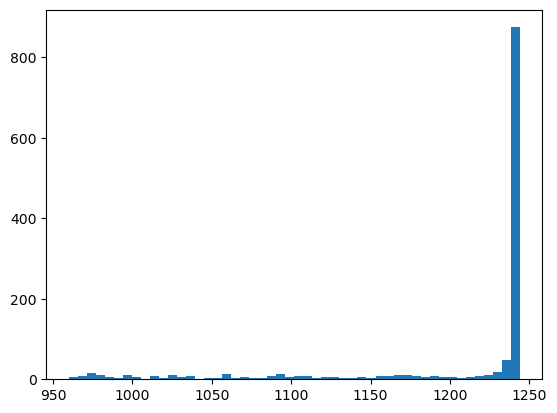

In [16]:
#degree distribution
import matplotlib.pyplot as plt
def plot_degree_distribution(G: nx.Graph):
    '''
    Plots the degree distribution of a networkx graph.

    param:
        - G: (nx.Graph) networkx graph

    return:
        None
    '''
    degrees=[G.degree(n) for n in G.nodes()]
    print(degrees)
    plt.hist(degrees, bins=50)
    plt.show()
    return None

plot_degree_distribution(G)

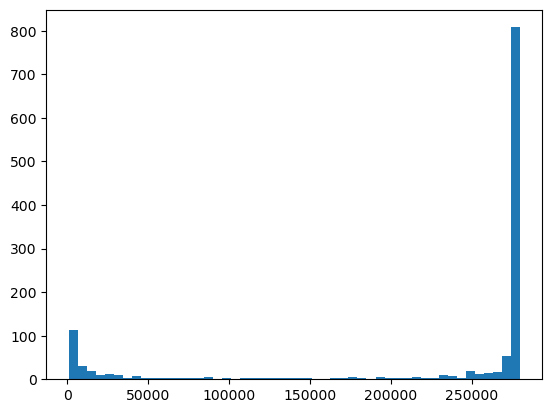

In [17]:
#weighted degree distribution
def plot_weighted_degree_distribution(G: nx.Graph):
    '''
    Plots the weighted degree distribution of a networkx graph.

    param:
        - G: (nx.Graph) networkx graph

    return:
        None
    '''
    degrees=[G.degree(n, weight='weight') for n in G.nodes()]
    plt.hist(degrees, bins=50)
    plt.show()
    return None

plot_weighted_degree_distribution(G)

In [18]:

def _label_samples(pheno_df: pd.DataFrame, samples_list:list) :
    '''
    Takes a dataframe of phenotypes out of the csv file of a species-drug, a list of all samples and returns 3 lists of resistant, susceptible and unclassfied samples
    In the csv if 
    param:
        - pheno_df: (pd.DataFrame) dataframe of phenotypes
        - samples_list: (list) list of all samples  

    output:
        - R: (list) list of resistant samples
        - S: (list) list of susceptible samples
        - U: (list) list of unclassified samples
    '''
    R=[];S=[];U=[]
    for sample in pheno_df.index:
        if pheno_df.loc[sample].values[0]==1:
            R.append(sample)
        elif pheno_df.loc[sample].values[0]==0:
            S.append(sample)
        else:
            U.append(sample)
    return R,S,U

R,S,U=_label_samples(pheno, sample_list)

In [19]:
f"# resistance is {len(R)} and S is {len(S)} and U is {len(U)}"
len(R)+len(S)

283

## ML and SL

In [51]:
#performing PCA on the gene presence/absence matrix

#1st get the labels as an add to the gene presence/absence matrix
def add_labels_to_presence_matrix(presence_df: pd.DataFrame, pheno_df: pd.DataFrame) -> pd.DataFrame:
    '''
    Adds the phenotypes to the gene presence/absence matrix.

    param:
        - presence_df: (pd.DataFrame) dataframe of gene presence/absence
        - pheno_df: (pd.DataFrame) dataframe of phenotypes

    return:
        - presence_df: (pd.DataFrame) dataframe of gene presence/absence with phenotypes
    '''
    #1. transposing the gene pres matrix to make genes as featrues
    presence_df=presence_df.T

    #2. setting identical index for both dataframes for the join
    presence_df.index.name='genome_id'
    presence_df.index = presence_df.index.astype(float)

    #3. join based on the index
    presence_df=presence_df.join(pheno_df, how='outer')
    

    return presence_df

labeled_matrix=add_labels_to_presence_matrix(presence, pheno)

In [57]:
#perform PCA

import sklearn

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def perform_PCA(presence_df: pd.DataFrame) -> pd.DataFrame:
    '''
    Performs PCA on the gene presence/absence matrix.

    param:
        - presence_df: (pd.DataFrame) dataframe of gene presence/absence

    return:
        - pca_df: (pd.DataFrame) dataframe of the PCA
    '''
    #1. drop SIR cols (label)
    X=presence_df.drop(columns=['SIR'])

    #2. standardize the data
    X=StandardScaler().fit_transform(X)

    #3. PCA
    pca=PCA(n_components=3)
    pca_result=pca.fit_transform(X)

    #4. create a df
    pca_df=pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
    pca_df.index=presence_df.index

    return pca_df

pca_df=perform_PCA(labeled_matrix)

In [58]:
pca_df

,PC1,PC2,PC3
genome_id,,,
195.2024,-5.231111,-0.331486,-0.554670
195.2025,-6.107291,-0.206086,-0.229470
195.2026,3.942802,-0.986866,1.148646
195.2027,7.307617,-0.214253,12.183154
195.2028,-5.967739,-1.665458,-0.387249
...,...,...,...
195.2671,-6.522203,-1.515331,-0.175631
195.2672,-7.111646,0.587693,0.325607
195.2673,-6.177612,1.186824,0.453440


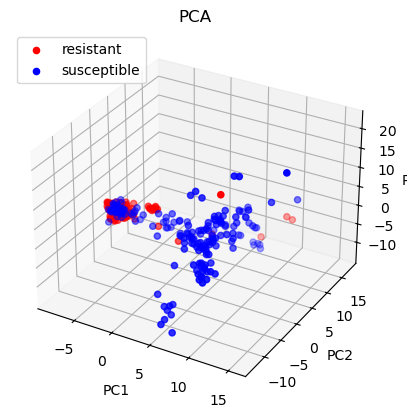

In [65]:
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

def plot_PCA(pca_df: pd.DataFrame, pheno_df: pd.DataFrame):
    '''
    Plots the PCA.

    param:
        - pca_df: (pd.DataFrame) dataframe of the PCA
        - pheno_df: (pd.DataFrame) dataframe of phenotypes

    return:
        None
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('PCA')

    R=pca_df[pheno_df['SIR']==1]
    S=pca_df[pheno_df['SIR']==0]

    ax.scatter(R['PC1'], R['PC2'], R['PC3'], c='r', marker='o', label='resistant')
    ax.scatter(S['PC1'], S['PC2'], S['PC3'], c='b', marker='o', label='susceptible')

    plt.legend(loc='upper left')
    plt.show()
    return None

plot_PCA(pca_df, labeled_matrix)

In [67]:
#choose features from PCA

def get_PCA(presence_df):
    X=presence_df.drop(columns=['SIR'])
    X=StandardScaler().fit_transform(X)
    pca=PCA(n_components=3)
    return pca

pca=get_PCA(labeled_matrix)

def get_PCA_features(pca: PCA, n:int) -> pd.DataFrame:
    '''
    Returns the n most important features from a PCA.

    param:
        - pca: (PCA) PCA object
        - n: (int) number of features

    return:
        - pca_features: (pd.DataFrame) dataframe of the n most important features
    '''

    pca

get_PCA_features(pca, 100)

AttributeError: 'PCA' object has no attribute 'components_'